# Table of Contents
[GDP Per Capita](#gdp)

There are three data sources that I will use for 2016. (data for 2015)
- [The Happy Planet Index](Online-data-for-chapter-2-whr-2016.xlsx)
- [The World Happiness Report 2016](https://worldhappiness.report/ed/2016/)
- [Kaggle Dataset of World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness#2016.csv)

In [1]:
# import libraries using common alias names
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# check what version of packages are installed.
print("NumPy version",np.__version__, "pandas version ",pd.__version__, "seaborn version",sns.__version__  )  # '1.16.2'

# set print options with floating point precision if 4, summarise long arrays using threshold of 5, suppress small results
np.set_printoptions(precision=4, threshold=5, suppress=True)  # set floating point precision to 4
pd.options.display.max_rows=8 # set options to display max number of rows

NumPy version 1.16.2 pandas version  0.24.2 seaborn version 0.9.0


In [2]:
!ls
#! head HappyPlanet16.csv

2015.csv
HappyPlanet.ipynb
HappyPlanet16.csv
HappySimulate.ipynb
LICENSE
Programming_for_Data_Analysis_Project2019.pdf
README.md
Simulation.ipynb
Untitled.ipynb
WHR.ipynb
WHR_Data_2016report.csv
WHR_Data_2019report.csv
data
etc
images
reports
whr_l16.ipynb
worldhappiness.ipynb


***
<a id="happyplanet"></a>
# The Happy Planet Index
This is the data for the Happy Planet Index 2016. It includes a column for GDP per capita dollars.

There are some similarities with the World Happiness Report.

In [3]:
# Read in the selected rows and columns from the excel sheet
hpi = pd.read_excel('data/hpi-data-2016.xlsx', sheet_name='Complete HPI data', header=5, nrows=140, usecols='B:O')
hpi.head()

,HPI Rank,Country,Region,Average Life Expectancy,Average Wellbeing (0-10),Happy Life Years,Footprint (gha/capita),Inequality of Outcomes,Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,GDP/capita ($PPP),Population,GINI index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48


In [4]:
hpi.columns

Index(['HPI Rank', 'Country', 'Region', 'Average Life \nExpectancy',
       'Average Wellbeing\n(0-10)', 'Happy Life Years',
       'Footprint\n(gha/capita)', 'Inequality of Outcomes',
       'Inequality-adjusted Life Expectancy', 'Inequality-adjusted Wellbeing',
       'Happy Planet Index', 'GDP/capita\n($PPP)', 'Population', 'GINI index'],
      dtype='object')

In [5]:
# write Happy Planet data for 2016 to a csv file
hpi.to_csv('HappyPlanet16.csv')

### Add column names:
The columns names need to be tidied up as they have spaces and line breaks included 

In [6]:
hpi_names=('HPI_Rank','Country','Region','Average_Life_Expectancy','Average_Wellbeing','Happy_Life_Years','Footprint','Inequality_of_Outcomes', 'IA_LifeExpectancy','IA_Wellbeing','HPI_Index','GDPpercapita','Population','GINI_Index')

In [7]:
# read in the csv file:
hpi16 = pd.read_csv('HappyPlanet16.csv', index_col=0, names=hpi_names, header=0)
hpi16.head()

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48


In [8]:
hpi16.columns

Index(['HPI_Rank', 'Country', 'Region', 'Average_Life_Expectancy',
       'Average_Wellbeing', 'Happy_Life_Years', 'Footprint',
       'Inequality_of_Outcomes', 'IA_LifeExpectancy', 'IA_Wellbeing',
       'HPI_Index', 'GDPpercapita', 'Population', 'GINI_Index'],
      dtype='object')

In [9]:
hpi16.tail()

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
135,29,Venezuela,Americas,73.885,7.1,41.494509,3.57,0.189280,65.453733,6.497572,33.569960,12771.595036,29854238,Data unavailable
136,5,Vietnam,Asia Pacific,75.477,5.5,32.770246,1.65,0.185921,64.794265,5.215639,40.307589,1754.547974,88809200,38.7
137,94,Yemen,Middle East and North Africa,63.340,4.1,15.204282,1.03,0.387313,44.721219,3.557846,22.754269,1289.034078,24882792,Data unavailable
138,77,Zambia,Sub Saharan Africa,58.409,5.0,16.674248,0.99,0.408122,38.674163,4.469524,25.224246,1686.618024,14786581,Data unavailable
139,99,Zimbabwe,Sub Saharan Africa,53.673,5.0,16.428627,1.37,0.366085,36.914005,4.608568,22.112535,850.827694,14565482,Data unavailable


In [10]:
hpi16.dtypes

HPI_Rank                     int64
Country                     object
Region                      object
Average_Life_Expectancy    float64
                            ...   
HPI_Index                  float64
GDPpercapita               float64
Population                   int64
GINI_Index                  object
Length: 14, dtype: object

In [11]:
hpi16.describe()

,HPI_Rank,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,1.400000e+02
mean,70.5000,70.925407,5.407835,30.248016,3.257543,0.232912,60.341523,4.972614,26.411113,13911.068748,4.800829e+07
std,40.5586,8.752559,1.148389,13.257900,2.303664,0.120883,14.880583,1.187299,7.317963,19746.184793,1.597180e+08
min,1.0000,48.910000,2.866667,8.970005,0.610000,0.043221,27.318494,2.420936,12.777156,244.196486,2.474980e+05
25%,35.7500,65.035750,4.575000,18.688270,1.425000,0.133526,48.211281,4.047168,21.206581,1628.064475,4.248207e+06
50%,70.5000,73.498000,5.250000,29.402414,2.680000,0.211742,63.406329,4.816266,26.290152,5691.063252,1.064617e+07
75%,105.2500,77.024500,6.225000,39.712583,4.482500,0.329324,72.574285,5.704285,31.541461,15159.065819,3.342601e+07
max,140.0000,83.572000,7.800000,59.315523,15.820000,0.507342,81.262817,7.624904,44.714071,105447.093241,1.350695e+09


### Print distribution plots of the actual variables

```python
# exclude first 2 columns, select all rows
for i in hpi.iloc[:, 4:13]:
    # print the name of the column
    print(i)
    # print the column to see the values
    print(hpi[i])
    # plot a distogram
    sns.distplot(hpi[i])
    # need to close each histogram otherwise all will be plotted on the same figure
    plt.show()
```

Average Wellbeing
(0-10)
0      3.8
1      5.5
2      5.6
3      6.5
      ... 
136    5.5
137    4.1
138    5.0
139    5.0
Name: Average Wellbeing\n(0-10), Length: 140, dtype: float64


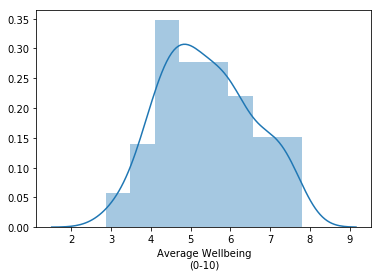

Happy Life Years
0      12.396024
1      34.414736
2      30.469461
3      40.166674
         ...    
136    32.770246
137    15.204282
138    16.674248
139    16.428627
Name: Happy Life Years, Length: 140, dtype: float64


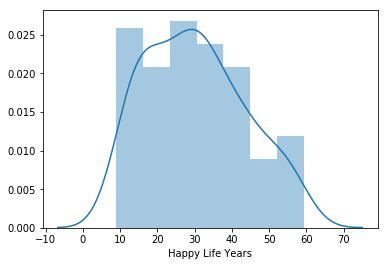

Footprint
(gha/capita)
0      0.79
1      2.21
2      2.12
3      3.14
       ... 
136    1.65
137    1.03
138    0.99
139    1.37
Name: Footprint\n(gha/capita), Length: 140, dtype: float64


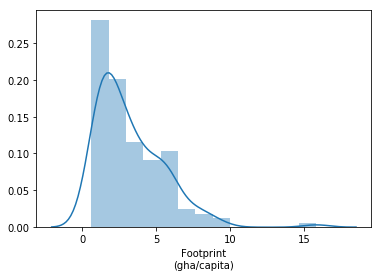

Inequality of Outcomes
0      0.426557
1      0.165134
2      0.244862
3      0.164238
         ...   
136    0.185921
137    0.387313
138    0.408122
139    0.366085
Name: Inequality of Outcomes, Length: 140, dtype: float64


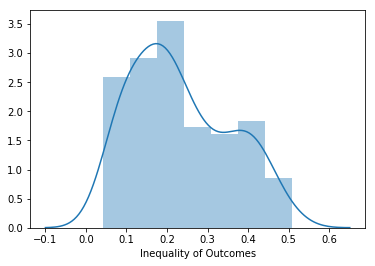

Inequality-adjusted Life Expectancy
0      38.348818
1      69.671159
2      60.474545
3      68.349583
         ...    
136    64.794265
137    44.721219
138    38.674163
139    36.914005
Name: Inequality-adjusted Life Expectancy, Length: 140, dtype: float64


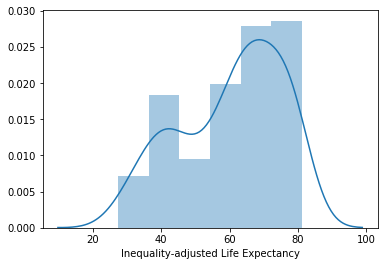

Inequality-adjusted Wellbeing
0      3.390494
1      5.097650
2      5.196449
3      6.034707
         ...   
136    5.215639
137    3.557846
138    4.469524
139    4.608568
Name: Inequality-adjusted Wellbeing, Length: 140, dtype: float64


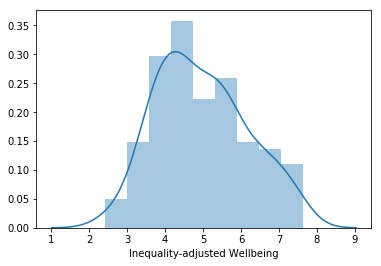

Happy Planet Index
0      20.225350
1      36.766874
2      33.300543
3      35.190244
         ...    
136    40.307589
137    22.754269
138    25.224246
139    22.112535
Name: Happy Planet Index, Length: 140, dtype: float64


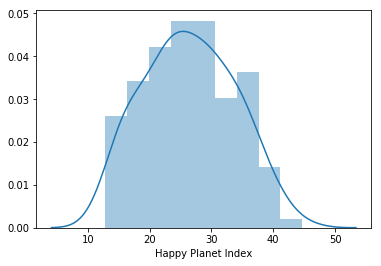

GDP/capita
($PPP)
0        690.842629
1       4247.485437
2       5583.616160
3      14357.411589
           ...     
136     1754.547974
137     1289.034078
138     1686.618024
139      850.827694
Name: GDP/capita\n($PPP), Length: 140, dtype: float64


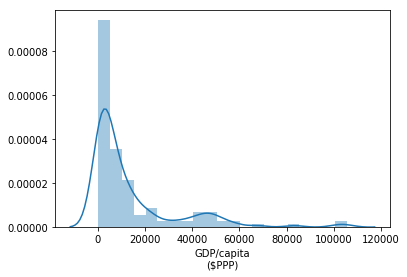

Population
0      29726803
1       2900489
2      37439427
3      42095224
         ...   
136    88809200
137    24882792
138    14786581
139    14565482
Name: Population, Length: 140, dtype: int64


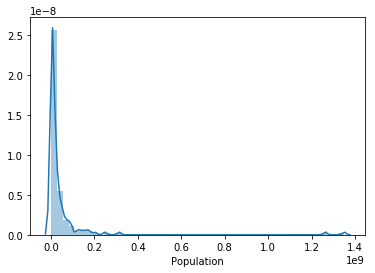

In [12]:
for i in hpi.iloc[:, 4:13]:
    # print the name of the column
    print(i)
    # print the column to see the values
    print(hpi[i])
    # plot a distogram
    sns.distplot(hpi[i])
    # need to close each histogram otherwise all will be plotted on the same figure
    plt.show()

In [127]:
hpi16.head()

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48


In [32]:
!ls images

Equation6 HPI.png
Equation6 Happy Planet Index.textClipping
Mean anthropometric measurements 2.png
Mean anthropometric measurements.png


## The Happy Planet Index and how it is calculated

### Happy Planet Index (approximate)

The Happy Planet Index is calculated as outlined in the [Happy Planets Index Methods Paper]( http://happyplanetindex.org/about#how)

$ Happy Planet Index Approximate  = \frac{(Life Expectancy * Experienced Wellbeing) * Inequality Of Outcomes }{Ecological Footprint}$

There are some other calculations involved to get to this point as detailed in the Methods paper. These are actually included in the dataset so I could either simulate the variables and then do the adjustments or simulate the adjusted variables.

For now I will focus recreate this index after simulating the individual columns. The methods outlines 5 equations. Equation 6 is the final calculation of the Happy Planet Index

To calculate HPI scores begin by multiplying the mean life expectancy of residents of a given country by mean experienced wellbeing of residents in the same country which gives the number of inequality-adjusted Happy Life Years experienced by a typical resident in each country.

### Inequality-Adjusted life expectancy

#### Equation 2: Atkinson Index

I dont think I actually need this as can get to `Inequality of Outcomes` without it.

Atkinson Index for Life Expectancy:
$Atkinson Index Of Life Expectancy = 1 - \frac{Geometric Mean Of Life Expectancy}{Mean Life Expectancy}$

In [128]:
from scipy.stats.mstats import gmean
gmean(hpi16.Average_Life_Expectancy)

70.34864409258057

In [129]:
from scipy.stats.mstats import gmean
Atkins=1-(gmean(hpi16.Average_Life_Expectancy))/np.mean(hpi16.Average_Life_Expectancy)
Atkins

0.008131966717016992

$Inequality Adjusted Life Expectancy = (1-Atkinson Index of Life Expectancy) × Mean Life Expectancy$


In [130]:
(1-Atkins)*hpi16.Average_Life_Expectancy

0      59.182782
1      76.718017
2      73.708689
3      75.309564
         ...    
136    74.863224
137    62.824921
138    57.934020
139    53.236533
Name: Average_Life_Expectancy, Length: 140, dtype: float64

### Inequality of Outcomes
Working out the calculations for the Inequality_Of_Outcomes.  
This part is working out to be equal to the `Inequality_of_Outcomes` column

In [131]:
1-((hpi16.IA_LifeExpectancy*hpi.IA_Wellbeing)/(hpi16.Average_Life_Expectancy*hpi16.Average_Wellbeing))

0      0.426557
1      0.165134
2      0.244862
3      0.164238
         ...   
136    0.185921
137    0.387313
138    0.408122
139    0.366085
Length: 140, dtype: float64

### Inequality-adjusted life expectancy.    
This is provided as a column. It looks like it is derived from the`Average_Life_Expectancy`
Inequality-adjusted life expectancy = (1-Atkinson Index of life expectancy) × Mean life expectancy

In [132]:
(1-Atkins)*hpi16.Average_Life_Expectancy

0      59.182782
1      76.718017
2      73.708689
3      75.309564
         ...    
136    74.863224
137    62.824921
138    57.934020
139    53.236533
Name: Average_Life_Expectancy, Length: 140, dtype: float64

In [133]:
hpi16.head()

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48


In [134]:
(hpi16.Average_Life_Expectancy*hpi16.Average_Wellbeing)

0      226.7384
1      425.4085
2      416.1528
3      493.5255
         ...   
136    415.1235
137    259.6940
138    292.0450
139    268.3650
Length: 140, dtype: float64

In [135]:
((hpi16.Average_Life_Expectancy*hpi16.Average_Wellbeing)*hpi16.Inequality_of_Outcomes/100)/hpi16.Footprint

0      1.224265
1      0.317870
2      0.480660
3      0.258139
         ...   
136    0.467758
137    0.976532
138    1.203938
139    0.717112
Length: 140, dtype: float64


<img src="images/Equation6 HPI.png" height="150" alt="Equation 6" />

### Working out the happy planet index based on the methods paper

To calculate HPI scores, begin by multiplying the mean life expectancy of residents of a given country by mean experienced wellbeing of residents in the same country... to get the number of inequality-adjusted Happy Life Years experienced by a typical resident in each country


$Happy Planet Index_IA = Φ × ((Experienced WellbeingIA - α × Life expectancyIA) + 𝜋) (Ecological Footprint + β)
where: IA = inequality adjusted, 𝛼 = 0.158, 𝛽 = 2.067, 𝜋 = 3.951, Φ = 0.452$


Essentially I need to calculate the HPI_Index. It is included in the dataset. 

### Equation 1


$Happy Planet Index ≈ ( Life Expectancy x Experienced Wellbeing) x Inequality Of Outcomes Ecological Footprint$


In [44]:
phi=0.452
alpha=0.158
Beta= 2.067
pi=3.951


In [137]:
(phi*((alpha*hpi16.IA_LifeExpectancy)+pi))/(hpi16.Footprint+Beta)

0      1.583679
1      1.580895
2      1.458013
3      1.280412
         ...   
136    1.725370
137    1.607899
138    1.487670
139    1.286617
Length: 140, dtype: float64

In [138]:
hpi16

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,5,Vietnam,Asia Pacific,75.477,5.5,32.770246,1.65,0.185921,64.794265,5.215639,40.307589,1754.547974,88809200,38.7
137,94,Yemen,Middle East and North Africa,63.340,4.1,15.204282,1.03,0.387313,44.721219,3.557846,22.754269,1289.034078,24882792,Data unavailable
138,77,Zambia,Sub Saharan Africa,58.409,5.0,16.674248,0.99,0.408122,38.674163,4.469524,25.224246,1686.618024,14786581,Data unavailable
139,99,Zimbabwe,Sub Saharan Africa,53.673,5.0,16.428627,1.37,0.366085,36.914005,4.608568,22.112535,850.827694,14565482,Data unavailable


In [47]:
hpi['calc']= phi*((hpi.IA_Wellbeing - (alpha* hpi.IA_LifeExpectancy) + pi))/ (hpi.Footprint+ Beta)

In [139]:
hpi16.head()

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48


In [140]:
hpi16.sort_values('HPI_Index', ascending=False)

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
28,1,Costa Rica,Americas,79.076,7.300000,48.174792,2.84000,0.145568,72.615551,6.792280,44.714071,9733.396931,4654148,48.61
79,2,Mexico,Americas,76.411,7.300000,44.262083,2.89000,0.187699,66.311965,6.832881,40.697292,9703.371017,122070963,48.07
26,3,Colombia,Americas,73.673,6.400000,35.070893,1.87000,0.235044,63.100669,5.715982,40.695011,7885.061292,46881018,53.54
134,4,Vanuatu,Asia Pacific,71.341,6.470000,34.895752,1.86262,0.223332,60.321329,5.943032,40.570099,3158.420974,247498,Data unavailable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,137,Benin,Sub Saharan Africa,59.167,3.200000,9.935781,1.41000,0.444113,37.269799,2.823961,13.422365,807.688451,10049792,Data unavailable
123,138,Togo,Sub Saharan Africa,58.601,2.866667,8.970005,1.13000,0.428742,39.639758,2.420936,13.233269,580.495062,6745581,Data unavailable
72,139,Luxembourg,Europe,81.111,7.000000,51.677888,15.82000,0.067837,78.970294,6.702020,13.151174,105447.093241,530946,34.79
23,140,Chad,Sub Saharan Africa,50.808,4.000000,9.580599,1.46000,0.507342,27.318494,3.665056,12.777156,972.679345,12715465,Data unavailable


In [142]:
hpi16.describe()

,HPI_Rank,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,1.400000e+02
mean,70.5000,70.925407,5.407835,30.248016,3.257543,0.232912,60.341523,4.972614,26.411113,13911.068748,4.800829e+07
std,40.5586,8.752559,1.148389,13.257900,2.303664,0.120883,14.880583,1.187299,7.317963,19746.184793,1.597180e+08
min,1.0000,48.910000,2.866667,8.970005,0.610000,0.043221,27.318494,2.420936,12.777156,244.196486,2.474980e+05
25%,35.7500,65.035750,4.575000,18.688270,1.425000,0.133526,48.211281,4.047168,21.206581,1628.064475,4.248207e+06
50%,70.5000,73.498000,5.250000,29.402414,2.680000,0.211742,63.406329,4.816266,26.290152,5691.063252,1.064617e+07
75%,105.2500,77.024500,6.225000,39.712583,4.482500,0.329324,72.574285,5.704285,31.541461,15159.065819,3.342601e+07
max,140.0000,83.572000,7.800000,59.315523,15.820000,0.507342,81.262817,7.624904,44.714071,105447.093241,1.350695e+09


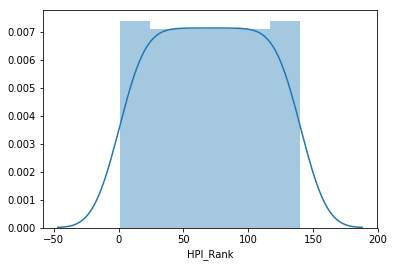

In [52]:
# plot the distribution of the actual HPI_Rank
sns.distplot(hpi.HPI_Rank);


In [143]:
hpi16.Average_Life_Expectancy.describe()

count    140.000000
mean      70.925407
std        8.752559
min       48.910000
25%       65.035750
50%       73.498000
75%       77.024500
max       83.572000
Name: Average_Life_Expectancy, dtype: float64

#### Life Expectancy:
I think the Inequality Adjusted Average Life Expectancy will follow the same pattern but has been rescaled by the Atkinson index

In [144]:
hpi16.Average_Life_Expectancy.isna().sum()

0

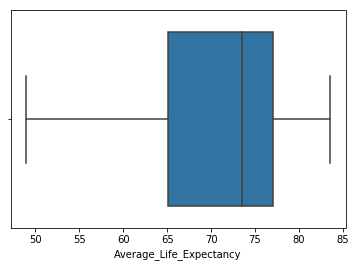

In [146]:
sns.boxplot(hpi16.Average_Life_Expectancy);

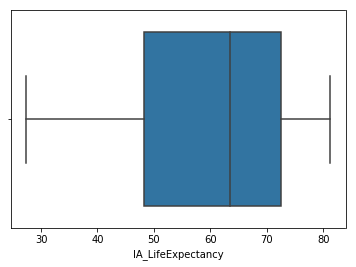

In [147]:
sns.boxplot(hpi16.IA_LifeExpectancy);

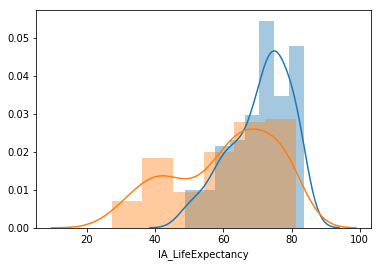

In [148]:
sns.distplot(hpi16.Average_Life_Expectancy);
sns.distplot(hpi16.IA_LifeExpectancy);

### Well being

In [149]:
hpi16.head(10)

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,43,Austria,Europe,81.004,7.4,54.436230,6.06,0.071294,78.022786,7.135020,30.478224,48324.254037,8429991,30.48
7,8,Bangladesh,Asia Pacific,70.843,4.7,23.289482,0.72,0.273657,56.624649,4.271013,38.390694,858.933363,155257387,Data unavailable
8,102,Belarus,Post-communist,70.874,5.7,34.014327,5.09,0.131910,66.744852,5.254227,21.718916,6721.834908,9464000,26.01
9,87,Belgium,Europe,80.429,6.9,49.537808,7.44,0.085373,77.210747,6.573976,23.726523,44731.219479,11128246,27.59


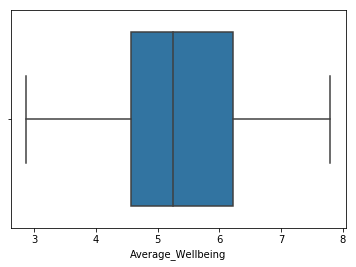

In [150]:
sns.boxplot(hpi16.Average_Wellbeing);

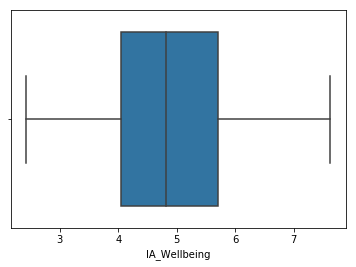

In [151]:
sns.boxplot(hpi16.IA_Wellbeing);

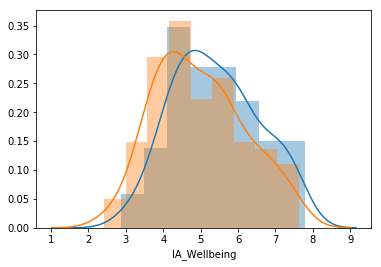

In [152]:
sns.distplot(hpi16.Average_Wellbeing)
sns.distplot(hpi16.IA_Wellbeing);

In [162]:
hpi16.head()

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
0,110,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803,Data unavailable
1,13,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489,28.96
2,30,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427,Data unavailable
3,19,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224,42.49
4,73,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339,30.48


### Kaggle data 2016
This is the same data as Figure2.2 data from the World Happiness Report of 2016.

In [380]:
# data from kaggle is a subset containing the main variables for 2016. Other years also available.
df =  pd.read_csv('data/world-happiness/2016.csv')  ## creata a DataFrame named df from reading in the csv file from a URL

In [384]:
df.head()
df.tail()
df.columns
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
                                  ...   
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Length: 13, dtype: object

### Recap on files so far:
- `whi16` contains Figure2.2 data for calculating the World Happiness Index and score for the 2016 report
- `data16` contains Table2.1 data for the World Happiness Report 2016
- `data19` contains Table2.6 data for the World Happiness Report 2019
- `df` contains the data from Kaggle for the 2016 World Happiness Report
- `hpi16` contains the data for calculating the Happy Planet Index for 2016

<a id="gdp"></a>
***
# GDP per capita


### GDP per capita


- GDP per capital is not part of the Happy Planet Index score calculation but it is provided as reference under column names 'GDPpercapita'. 
- GDP per capital forms part of the input for the World Happiness Report score under the 'Explained by: GDP per capita' variable.
- The World Happiness report data contains 'Log GDP per capita' over the years up to 2016

- <https://gist.github.com/jkclem/d2f522c4131910264f7e1e732d7cc3af>  
- <https://towardsdatascience.com/modeling-gdp-per-capita-and-life-expectancy-a6a34a5dd84>  
As it is and using a log scale 

Look at a Pareto distribution


### Plot GDP per capita

#### Happy Planet Index GDP per capital

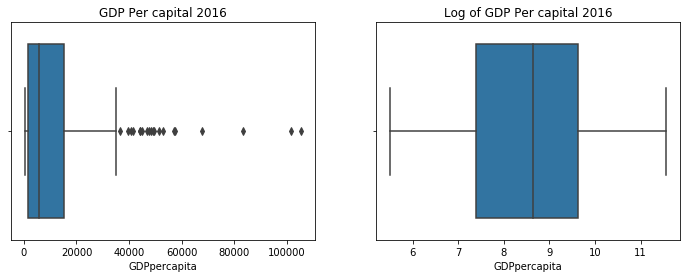

In [385]:
f, axes = plt.subplots(1,2,figsize=(12, 4))
sns.boxplot(hpi16.GDPpercapita, ax=axes[0])
axes[0].set_title("GDP Per capital 2016")
sns.boxplot(np.log(hpi16.GDPpercapita), ax=axes[1])
axes[1].set_title("Log of GDP Per capital 2016");

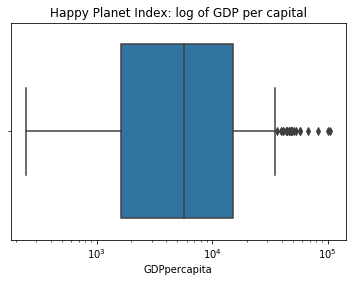

In [386]:
# # Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(6, 4))
ax.set_xscale("log")
sns.boxplot(hpi16.GDPpercapita)
plt.title("Happy Planet Index: log of GDP per capital");

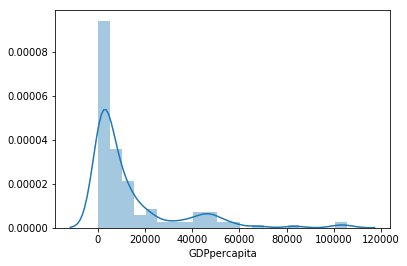

In [388]:
sns.distplot(hpi16.GDPpercapita);
sns.distplot(hpi16.GDPpercapita);

### World Happiness Report 2016

The World Happiness Report is available for each year from 2012 to 2019 containing data for the prior year.
For each year there is an excel file with several sheets including one sheet with annual data for different variables over a number of years and other sheets containing the data for the calculation of the World Happiness score for that year. The latest data excel file is read in above as 'whr19data' from which I can filter for 2016. 
The excel data file that goes with the World Happiness Report 2016 includes data up to end 2015. Some of the data such as Log GDP per capita for 2016 was forecast from the previous years.
There are some differences between the log of the GDP per capita data in the Happy Planet 2016 data and the World Happiness GDP data for 2016. However as seen below the distribution is very similar which is all that matters here.

In [294]:
# The data for 2016 in the big file for all years in the report for 2016
whr16data= whr.loc[whr.loc[:,'year']==2016]
# data excel file for 2019 includes data for the previous years. 
WHRdata16 =whr19data.loc[whr19data.loc[:, 'Year'] == 2016]
#WHR16.info()

In [297]:
# from 2016 excel data file
whr16data.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
18,Albania,2016,4.511101,9.337774,0.638411,68.871811,0.729819,-0.023276,0.901071,0.675244,0.321706,0.400910,0.208456,-0.139161,2.646668,0.586701,NaN,0.303250,0.416540
24,Algeria,2016,5.340854,9.541166,0.748588,65.509514,NaN,NaN,NaN,0.660510,0.377112,NaN,-1.008262,-0.814304,2.114553,0.395920,NaN,0.276000,0.604617
40,Argentina,2016,6.427221,9.824955,0.882819,67.398514,0.847702,-0.191952,0.850924,0.841907,0.311646,0.419562,0.381370,-0.238002,2.127109,0.330953,NaN,0.476067,0.332071
52,Armenia,2016,4.325472,9.010698,0.709218,64.962730,0.610987,-0.158839,0.921421,0.593600,0.437228,0.184713,-0.609075,-0.143278,2.126364,0.491591,NaN,0.325067,0.381564


In [298]:
# from 2019 excel data file
WHRdata16.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
8,Afghanistan,2016,4.220169,7.497038,0.559072,53.000000,0.522566,0.051365,0.793246,0.564953,...,NaN,NaN,0.418629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Albania,2016,4.511101,9.337532,0.638411,68.099998,0.729819,-0.020687,0.901071,0.675244,...,NaN,0.303250,0.416540,NaN,NaN,NaN,0.243243,0.232000,NaN,NaN
26,Algeria,2016,5.340854,9.541166,0.748588,65.500000,NaN,NaN,NaN,0.660510,...,NaN,0.276000,0.604617,NaN,NaN,NaN,NaN,0.107644,NaN,0.179286
43,Argentina,2016,6.427221,9.830088,0.882819,68.400002,0.847702,-0.188304,0.850924,0.841907,...,0.424,0.460938,0.332071,NaN,0.270073,0.223553,0.170844,0.150154,0.174058,0.193531
56,Armenia,2016,4.325472,9.010698,0.709218,66.300003,0.610987,-0.157249,0.921421,0.593600,...,0.325,0.319250,0.381564,NaN,NaN,NaN,0.235000,NaN,NaN,0.109136


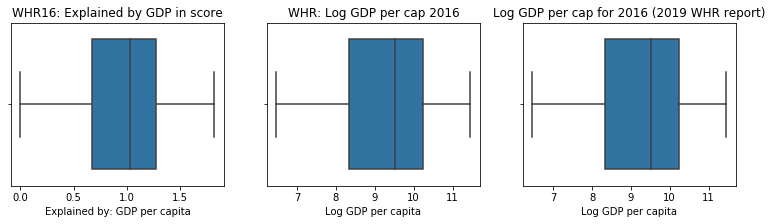

In [315]:
f,axes = plt.subplots(1,3,figsize=(13,3))
sns.boxplot(whr16['Explained by: GDP per capita'], ax=axes[0])
axes[0].set_title("WHR16: Explained by GDP in score");
sns.boxplot(WHR16['Log GDP per capita'], ax=axes[1])
axes[1].set_title("WHR: Log GDP per cap 2016");
sns.boxplot(WHRdata16['Log GDP per capita'], ax=axes[2])
axes[2].set_title("Log GDP per cap for 2016 (2019 WHR report)");

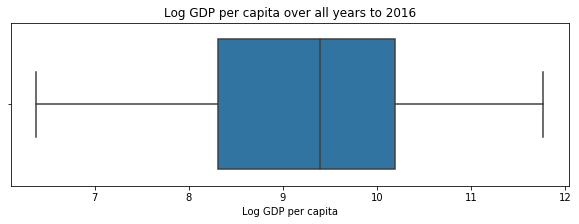

In [316]:
# plotting boxplot of GDP per capital over all years from the big file with the 2016 report
f,ax = plt.subplots(figsize=(10,3))
sns.boxplot(whr['Log GDP per capita'])
plt.title("Log GDP per capita over all years to 2016");

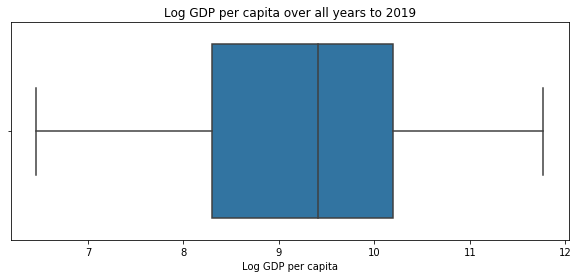

In [313]:
# plotting boxplot of GDP per capital over all years from the big file
f,ax = plt.subplots(figsize=(10,4))
sns.boxplot(whr19data['Log GDP per capita'])
plt.title("Log GDP per capita over all years to 2019");

In [345]:
# The data for 2016 in the big file for all years
WHR16big =whr.loc[whr.loc[:, 'year'] == 2016]
#WHR16.info()

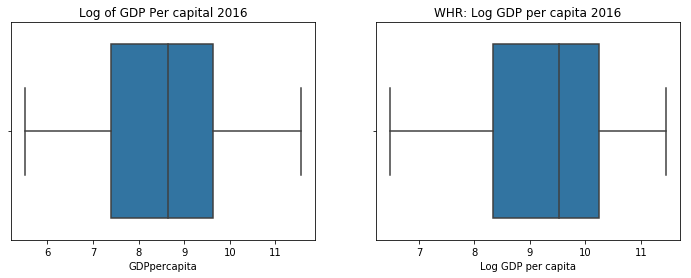

In [346]:
f,axes = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(np.log(hpi16.GDPpercapita), ax=axes[0])
axes[0].set_title("Log of GDP Per capital 2016");
sns.boxplot(WHR16['Log GDP per capita'], ax=axes[1])
axes[1].set_title("WHR: Log GDP per capita 2016");

The boxplots for Log GDP per capita for 2016 look a little different so lets have a look at why.
I think there might be additional countries in one file or they could be slightly different measurements of GDP.
However it is not really essential for this project. The aim here is to look at the distribution to see the likely distribution of the data in the dataset and how the different variables might relate to each other and then to synthesise/simulate a data set as closely matching their properties as possible.

From reading through the [Statistical Appendix of the World Happiness Report 2016](https://s3.amazonaws.com/happiness-report/2016/StatisticalAppendixWHR2016.pdf) I can see that the researchers had to do some forcasting for this report as the figures were not yet available at the time.

### Plotting the distributions of the GDP per capita variables

In [348]:
# The data for 2016 in the big file for all years in the report for 2016
whr16data.head()
# data excel file for 2019 includes data for the previous years. Here have extracted 2016 data
WHR16big.tail()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
1516,Venezuela,2016,4.041115,9.534059,0.901949,64.746765,0.457602,-0.206907,0.890125,0.688201,0.391754,0.164022,-1.080449,-1.715335,2.649300,0.655586,NaN,0.497167,0.397183
1527,Vietnam,2016,5.062267,8.692030,0.876324,66.075638,0.894351,-0.090152,0.799240,0.536226,0.222550,NaN,-0.619272,-0.197976,1.767819,0.349215,NaN,0.364286,0.436878
1537,Yemen,2016,3.825631,7.751505,0.775407,54.796665,0.532964,-0.157162,NaN,0.469345,0.227925,0.267581,-2.222766,-1.642179,2.105525,0.550373,NaN,0.357000,0.411021
1548,Zambia,2016,4.347544,8.201650,0.767047,53.267151,0.811575,0.112273,0.770644,0.730680,0.372241,0.696892,-0.058471,-0.460033,3.197226,0.735410,NaN,0.527400,0.681393
1560,Zimbabwe,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,-0.863044,-1.371214,2.776363,0.743257,NaN,0.432000,0.596690


### Log GDP per capita

In [349]:

# log GDP from the 2016 data
GPD_log16= whr16data['Log GDP per capita'].dropna()
# log GDP from the latest WHR data 2019
GDP_log19= whr19data['Log GDP per capita'].dropna()
WHR16big.isna().sum()

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                            3
                                                           ... 
Standard deviation/Mean of ladder by country-year             0
GINI index (World Bank estimate)                            142
GINI index (World Bank estimate), average 2000-15            17
gini of household income reported in Gallup, by wp5-year      0
Length: 19, dtype: int64

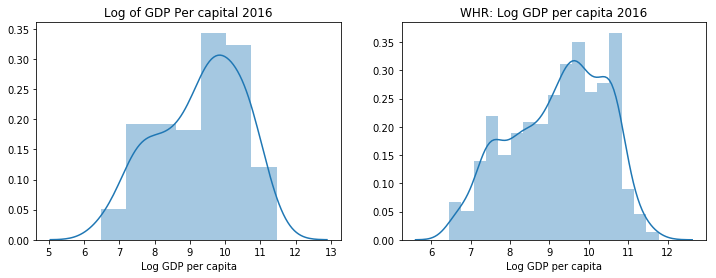

In [340]:
f,axes = plt.subplots(1,2,figsize=(12,4))
sns.distplot(GPD_log16, ax=axes[0])
axes[0].set_title("Log of GDP Per capital 2016");
sns.distplot(GDP_log19, ax=axes[1])
axes[1].set_title("WHR: Log GDP per capita 2016");
WHR19 =whr.loc[whr.loc[:, 'year'] == 2016]

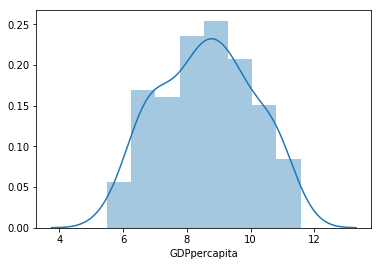

In [319]:
sns.distplot(np.log(hpi16.GDPpercapita));

*** 
### Aside: Investigating differences in GDP from the different data sources

Here I am checking how many countries are reflected in the datasets and what the values are.

In [238]:
hpi16.describe(include=['object'])
# 140 countries in the happy planet index data

,Country,Region,GINI_Index
count,140,140,140
unique,140,6,65
top,Iran,Sub Saharan Africa,Data unavailable
freq,1,34,75


In [239]:
WHR16.describe(include=['object'])
# 142 countries in the data for 2016 from the World Happiness data to date

,country
count,142
unique,142
top,Iran
freq,1


In [240]:
whr16.describe(include=['object'])
# 157 countries in the World Happiness report for 2016

,Country
count,157
unique,157
top,Iran
freq,1


In [241]:
type(hpi16['Country'].unique())

numpy.ndarray

In [273]:
print(f"The countries in the Happy Planet Index are: {hpi16['Country'].unique()}. \n ")
print(f"The countries in the World Happiness data are:{WHR16['country'].unique()} \n")
print(f"The countries in the World Happiness Index are: {whr16['Country'].sort_values().unique()}\n")

The countries in the Happy Planet Index are: ['Afghanistan' 'Albania' 'Algeria' ... 'Yemen' 'Zambia' 'Zimbabwe']. 
 
The countries in the World Happiness data are:['Afghanistan' 'Albania' 'Algeria' ... 'Yemen' 'Zambia' 'Zimbabwe'] 

The countries in the World Happiness Index are: ['Afghanistan' 'Albania' 'Algeria' ... 'Yemen' 'Zambia' 'Zimbabwe']



In [276]:
for i in hpi16['Country'].unique():
    print(i)
for i in WHR16['country'].unique():
    print(i)
for i in whr16['Country'].sort_values().unique():
    print(i)

In [257]:
print(f"{hpi16['Country'].isin(WHR16['country']).sum()}")
print(f"{WHR16['country'].isin(hpi16['Country']).sum()}")  
print(f"{whr16['Country'].isin(WHR16['country']).sum()}")
print(f"{WHR16['country'].isin(whr16['Country']).sum()}")

119
119
138
138


In [278]:
hpi16.loc[hpi16.loc[:, 'Country'] == 'Ireland']

,HPI_Rank,Country,Region,Average_Life_Expectancy,Average_Wellbeing,Happy_Life_Years,Footprint,Inequality_of_Outcomes,IA_LifeExpectancy,IA_Wellbeing,HPI_Index,GDPpercapita,Population,GINI_Index
59,48,Ireland,Europe,80.518,7.0,50.349743,5.57,0.084939,77.533789,6.651964,30.01653,48976.929753,4586897,32.52


In [280]:
whr16.loc[whr16.loc[:,'Country']=="Ireland"]

,Country,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (2.33) + residual
18,Ireland,6.907,6.977938,6.836063,1.483414,1.161568,0.814549,0.540084,0.449628,0.297537,2.159882


In [285]:
whr.loc[whr.loc[:,'country']=='Ireland']

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
633,Ireland,2006,7.144247,10.776432,0.967041,69.458565,0.943275,0.233712,0.472849,0.878256,0.208634,0.632927,1.294262,1.701432,1.820700,0.254848,0.327,0.325545,NaN
634,Ireland,2008,7.568030,10.737757,0.982522,70.206833,0.894109,0.313648,0.486995,0.875384,0.147759,0.513728,1.304415,1.719995,1.511517,0.199724,0.309,0.325545,NaN
635,Ireland,2009,7.045911,10.680227,0.958702,70.290215,0.834730,0.306952,0.579600,0.862124,0.232699,0.292569,1.205060,1.636236,1.812250,0.257206,0.327,0.325545,0.654719
636,Ireland,2010,7.257390,10.692636,0.972886,70.775520,0.856030,0.339643,0.618024,0.875983,0.200655,0.332579,1.172299,1.606687,1.905357,0.262540,0.323,0.325545,0.575251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,Ireland,2014,7.018379,10.806234,0.967745,71.305725,0.921630,0.252200,0.406036,0.784335,0.228723,0.459882,1.185246,1.686500,1.672050,0.238239,0.319,0.325545,0.495984
641,Ireland,2015,6.830125,11.020999,0.952943,71.440414,0.892277,0.219868,0.408757,0.799320,0.225349,0.571841,1.121519,1.685623,1.771660,0.259389,NaN,0.325545,0.393113
642,Ireland,2016,7.040731,11.050761,0.958144,71.575096,0.874589,0.161004,0.398544,0.809203,0.211063,0.574740,1.085433,1.564082,1.843073,0.261773,NaN,0.325545,0.365785
643,Ireland,2017,7.060155,11.066487,0.943482,71.709785,0.905341,0.206802,0.337085,0.833389,0.212784,0.603800,NaN,NaN,1.761334,0.249475,NaN,0.325545,0.367454


In [281]:
np.log(48976.929753)

10.799104644854236

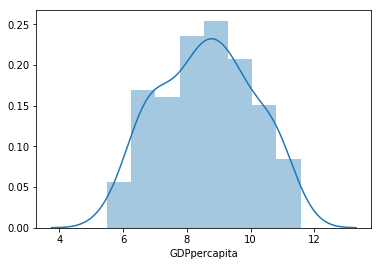

In [158]:
sns.distplot(np.log(hpi16.GDPpercapita));


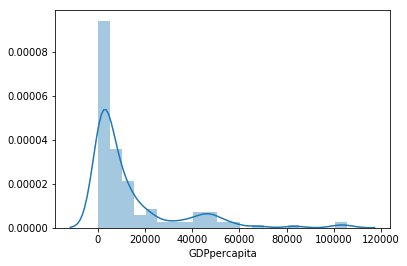

In [159]:
sns.distplot(hpi16.GDPpercapita);

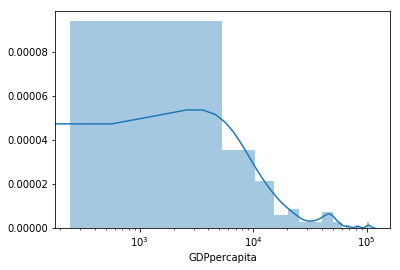

In [161]:
# # Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(6,4))
ax.set_xscale("log")
sns.distplot(hpi16.GDPpercapita);

- hpi16.GDPpercapita
- whr.Log GDP per capita
- Explained by: GDP per capita

In [188]:
whr.loc[whr.loc[:, 'year'] == 2016]

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
18,Albania,2016,4.511101,9.337774,0.638411,68.871811,0.729819,-0.023276,0.901071,0.675244,0.321706,0.400910,0.208456,-0.139161,2.646668,0.586701,NaN,0.303250,0.416540
24,Algeria,2016,5.340854,9.541166,0.748588,65.509514,NaN,NaN,NaN,0.660510,0.377112,NaN,-1.008262,-0.814304,2.114553,0.395920,NaN,0.276000,0.604617
40,Argentina,2016,6.427221,9.824955,0.882819,67.398514,0.847702,-0.191952,0.850924,0.841907,0.311646,0.419562,0.381370,-0.238002,2.127109,0.330953,NaN,0.476067,0.332071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,Vietnam,2016,5.062267,8.692030,0.876324,66.075638,0.894351,-0.090152,0.799240,0.536226,0.222550,NaN,-0.619272,-0.197976,1.767819,0.349215,NaN,0.364286,0.436878
1537,Yemen,2016,3.825631,7.751505,0.775407,54.796665,0.532964,-0.157162,NaN,0.469345,0.227925,0.267581,-2.222766,-1.642179,2.105525,0.550373,NaN,0.357000,0.411021
1548,Zambia,2016,4.347544,8.201650,0.767047,53.267151,0.811575,0.112273,0.770644,0.730680,0.372241,0.696892,-0.058471,-0.460033,3.197226,0.735410,NaN,0.527400,0.681393
1560,Zimbabwe,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,-0.863044,-1.371214,2.776363,0.743257,NaN,0.432000,0.596690


In [321]:
whr16 =whr.query('(year == 2016)')

In [165]:
whr16.head()

,Country,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (2.33) + residual
0,Denmark,7.526,7.591507,7.460493,1.441784,1.163745,0.795040,0.579413,0.361710,0.444532,2.739390
1,Switzerland,7.509,7.589791,7.428208,1.527334,1.145236,0.863029,0.585572,0.280825,0.412033,2.694632
2,Iceland,7.501,7.669368,7.332632,1.426655,1.183259,0.867333,0.566242,0.476784,0.149747,2.831373
3,Norway,7.498,7.574923,7.421077,1.577440,1.126896,0.795789,0.596086,0.378948,0.357758,2.664645
4,Finland,7.413,7.474935,7.351065,1.405979,1.134640,0.810914,0.571037,0.254919,0.410040,2.825965
